In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from tensorflow import keras


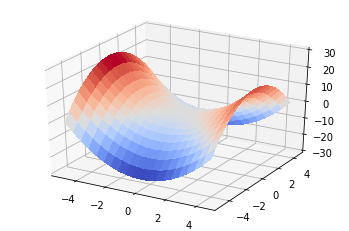

In [2]:
# Generación de los datos para la graficación y para el entrenamiento
Xg = np.arange(-5, 5, 0.5)
Yg = np.arange(-5, 5, 0.5)
Xg, Yg = np.meshgrid(Xg, Yg)
Zg = (Xg**2 - Yg**2)
# Visualización de la superficie a aprender por la RNA
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Xg, Yg, Zg, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-30, 30)
plt.show()



In [3]:
np.shape(Xg)

(20, 20)

In [4]:
#Inicialización de Variables con los datos de entrenamiento
x_train=np.zeros([400,2],dtype=np.float64)
yd_train=np.zeros([400,1],dtype=np.float64)
#Escritura de los datos de entrenamiento
x_train[:,0]=np.reshape(Xg,(400)) 
x_train[:,1]=np.reshape(Yg,(400)) 
yd_train[:,0]=np.reshape(Zg,(400)) 

#Número de patrones de entrenamiento  
n_samples=400 


In [5]:
modelo=keras.models.Sequential()
modelo.add(keras.layers.Dense(20,input_dim=2,activation='tanh'))
modelo.add(keras.layers.Dense(1,activation='linear'))
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


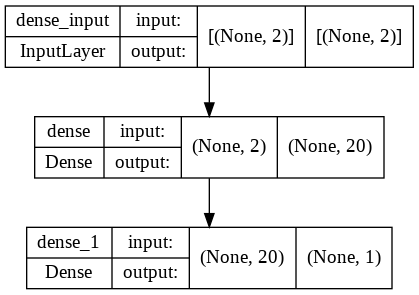

In [6]:
keras.utils.plot_model(modelo, "RNA_Silla.png", show_shapes=True)

In [7]:
modelo.compile('Adam','mse',metrics=['mse'])




In [8]:
historia=modelo.fit(x_train,yd_train,epochs=100,verbose=0)

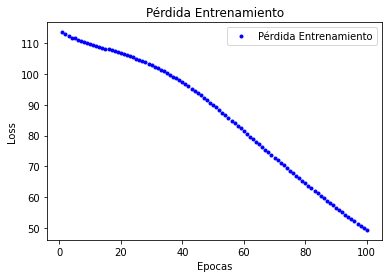

In [9]:
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b.', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
modelo.evaluate(x_train,yd_train)

13/13 [==============================] - 0s 2ms/step - loss: 48.9699 - mse: 48.9699


[48.96986770629883, 48.96986770629883]

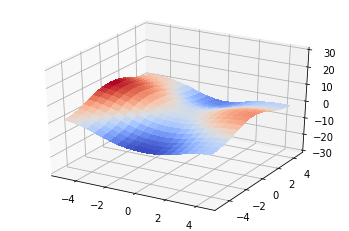

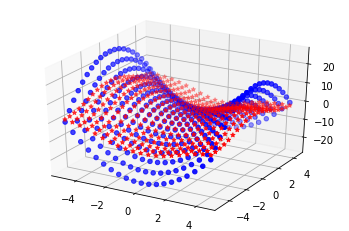

In [11]:
pred=modelo.predict(x_train)
#Figura donde se graficarán la superficie generada por la red
fig = plt.figure()
ax = fig.gca(projection='3d')
#Se convierte la salida de la red en matriz para la graficación de la superficie
Zgred = np.reshape(pred,(20,20))
surf = ax.plot_surface(Xg, Yg, Zgred, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-30, 30)
plt.show()

#Figura donde se graficarán los puntos de entrenamiento
fig = plt.figure()
ax = fig.gca(projection='3d')
Xgv=x_train[:,0]
Ygv=x_train[:,1]

ax.scatter(Xgv,Ygv,pred,color='red',marker='*')
ax.scatter(Xgv,Ygv,yd_train[:,0],color='blue',marker='o')

plt.show()



In [12]:
Wco = modelo.layers[0].get_weights()[0]
print(Wco.shape)
print(Wco)
bco = modelo.layers[0].get_weights()[1]
print(bco.shape)
print(bco)


(2, 20)
[[ 0.01475771 -0.01929679 -0.01471057  0.53900814  0.5247638   0.52494067
   0.02196251  0.66821194  0.01892501 -0.50871813 -0.5087812  -0.5358419
  -0.6728018  -0.6072695   0.01721949  0.01808465 -0.6410418  -0.01592229
   0.01685592  0.01847841]
 [ 0.5718103  -0.5728406   0.63358086 -0.05492612 -0.06466173 -0.06198339
  -0.5855549   0.07179927  0.54833937  0.06057426  0.05914716  0.05407842
  -0.07495502 -0.07292084  0.5516652  -0.56209606 -0.08414137 -0.57359505
   0.6032573  -0.6116223 ]]
(20,)
[-1.2015271  1.1972499  1.5438548  1.2537663  1.1818362  1.190537
 -1.3338187 -1.2925743 -1.0975386 -1.1336906 -1.1195456 -1.2411479
  1.3043422  1.0866971 -1.1244868 -1.2431605  1.150527   1.2097611
 -1.3243243 -1.447561 ]


In [13]:
Wcs = modelo.layers[1].get_weights()[0]
print(Wcs.shape)
print(Wcs)
bcs = modelo.layers[1].get_weights()[1]
print(bcs.shape)
print(bcs)

(20, 1)
[[-0.69900876]
 [ 0.8196676 ]
 [ 0.9801407 ]
 [-0.96565336]
 [-1.0572268 ]
 [-0.91204333]
 [-1.3385942 ]
 [ 0.8714224 ]
 [-0.8734678 ]
 [ 0.839334  ]
 [ 1.2595744 ]
 [ 0.98679554]
 [-0.9048398 ]
 [-0.9280191 ]
 [-0.7662894 ]
 [-1.2249727 ]
 [-1.2302921 ]
 [ 0.68661505]
 [-0.710219  ]
 [-1.0808033 ]]
(1,)
[0.02126544]
